In [1]:
%cd ~/project/23.03_DHODH
from workflow.modules import *

/cluster/project/beltrao/jjaenes/23.03_DHODH


In [2]:
df_ = pd.concat([
    pd.read_csv('results/pdb.smina.plot_lig_decoys/1d3g.tsv', sep='\t').query('is_decoy == False')[['label', 'decoyNormalisedAffinity']].rename({'decoyNormalisedAffinity': '1d3g'}, axis=1).set_index('label'),
    pd.read_csv('results/pdb.smina.plot_lig_decoys/1d3h.tsv', sep='\t').query('is_decoy == False')[['label', 'decoyNormalisedAffinity']].rename({'decoyNormalisedAffinity': '1d3h'}, axis=1).set_index('label'),
    pd.read_csv('results/pdb.smina.plot_lig_decoys/4igh.tsv', sep='\t').query('is_decoy == False')[['label', 'decoyNormalisedAffinity']].rename({'decoyNormalisedAffinity': '4igh'}, axis=1).set_index('label'),
    pd.read_csv('results/pdb.smina.plot_lig_decoys/6j3c.tsv', sep='\t').query('is_decoy == False')[['label', 'decoyNormalisedAffinity']].rename({'decoyNormalisedAffinity': '6j3c'}, axis=1).set_index('label'),
], axis=1)
df_['mean'] = df_.mean(axis=1)
df_.sort_values('mean', ascending=False)

,1d3g,1d3h,4igh,6j3c,mean
label,,,,,
Teriflunomide_P10000013,2.234583,2.947899,2.853837,1.480203,2.379131
Tegaserod_maleate_P10000024,2.469501,2.524640,1.900710,2.152462,2.261828
Dicumarol_P10000018,2.163257,1.979603,1.705860,2.535172,2.095973
Leflunomide_P10000011,2.057142,2.006280,2.452952,1.741217,2.064398
Dicumarol_P10000017,1.495839,2.487934,1.744027,2.478466,2.051567
Cisatracurium_besylate_P10000026,1.514231,2.431096,2.126379,1.352714,1.856105
Flunarizine_dihydrochloride_P10000021,0.955996,2.807138,1.685726,1.911755,1.840154
Teriflunomide_P10000014,1.669704,1.813793,1.678161,1.618574,1.695058
Tegaserod_maleate_P10000023,1.709475,1.927084,1.366594,1.558264,1.640354


In [3]:
df_.merge(read_dude(), left_index=True, right_on='compounds_id').groupby('input_id').agg({'mean': np.mean})['mean'].sort_values(ascending=False)

input_id
Dicumarol                      2.073770
Leflunomide                    2.064398
Teriflunomide                  2.037094
Cisatracurium_besylate         1.856105
Tegaserod_maleate              1.766641
Amethopterin                   1.594124
Flunarizine_dihydrochloride    1.516309
Mesoridazine_besylate          0.471516
Azaribine                     -0.451268
Tiratricol                    -1.471158
Felodipine                    -1.738000
Name: mean, dtype: float64

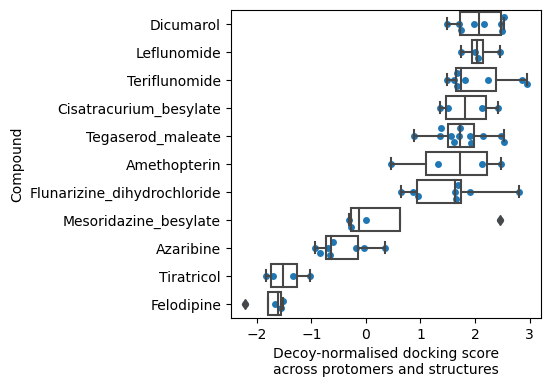

In [4]:
df_plt_ = pd.concat([
    df_.merge(read_dude(), left_index=True, right_on='compounds_id')[['input_id', '1d3g']].rename({'1d3g': 'score'}, axis=1),
    df_.merge(read_dude(), left_index=True, right_on='compounds_id')[['input_id', '1d3h']].rename({'1d3h': 'score'}, axis=1),
    df_.merge(read_dude(), left_index=True, right_on='compounds_id')[['input_id', '4igh']].rename({'4igh': 'score'}, axis=1),
    df_.merge(read_dude(), left_index=True, right_on='compounds_id')[['input_id', '6j3c']].rename({'6j3c': 'score'}, axis=1),
], axis=0)
order_ = df_plt_.groupby('input_id').agg({'score': np.mean})['score'].sort_values(ascending=False).index.tolist()
plt.figure(figsize=(4, 4))
sns.boxplot(data=df_plt_, x='score', y='input_id', order=order_, boxprops={'facecolor':'None'})
sns.swarmplot(data=df_plt_, x='score', y='input_id', order=order_, zorder=.5)
plt.gca().set_xlabel('Decoy-normalised docking score\nacross protomers and structures')
plt.gca().set_ylabel('Compound')
plt.savefig('adhoc/B_meanDecoyNormalisedAffinity/meanDecoyNormalisedAffinity.pdf', bbox_inches='tight', transparent=True)